In [23]:
import fitz
import numpy as np
import pandas as pd
from tqdm import tqdm

### import books

In [24]:
vol1_path = '../input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 1.pdf'
vol2_path = '../input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 2.pdf'
vol3_path = '../input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 3.pdf'

vol1_doc = fitz.open(vol1_path)
vol2_doc = fitz.open(vol2_path)
vol3_doc = fitz.open(vol3_path)

vol1_pages = [vol1_doc[i] for i in range(vol1_doc.page_count)]
vol2_pages = [vol2_doc[i] for i in range(vol2_doc.page_count)]
vol3_pages = [vol3_doc[i] for i in range(vol3_doc.page_count)]

#### preset values (DPI)

In [25]:
TARGET_DPI = 300
mat = fitz.Matrix(TARGET_DPI/ 72, TARGET_DPI/ 72)

### initialize sample page_num and book

In [117]:
page_num = 340
vol = '1'
pages = vol1_pages

In [118]:
page = pages[page_num]

#### dev side notes

helpful documentation: https://pymupdf.readthedocs.io/en/latest/textpage.html#TextPage.extractDICT

<img src="https://pymupdf.readthedocs.io/en/latest/_images/img-textpage.png"
     alt="fitz documentation on get_text"
     style="float: left; margin-right: 10px; background-color: white;" />

<img src="./span_dict_doc.png"
     alt="fitz documentation on span blocks"
     style="float: left; margin-right: 10px; background-color: white;" />

In [40]:
# for each page, the heights and width values seem to be the same
pd.DataFrame(page.get_text("dict"))[['width', 'height']].value_counts()

width  height
426.0  642.0     59
dtype: int64

In [26]:
#the keys of each dictionary
page.get_text("dict")['blocks'][0].keys()

dict_keys(['number', 'type', 'bbox', 'lines'])

In [46]:
# TODO: I need to somehow connect the raw dict and dict variants
#       - possible way: see if a characters falls into the bbox of a word ... seems computationaly heavy

In [44]:
page.get_text("rawdict")['blocks'][0]

{'number': 0,
 'type': 0,
 'bbox': (170.63999938964844,
  22.124988555908203,
  402.01300048828125,
  31.024988174438477),
 'lines': [{'spans': [{'size': 8.855387687683105,
     'flags': 4,
     'font': 'Times-Roman',
     'color': 0,
     'ascender': 0.75,
     'descender': -0.25,
     'chars': [{'origin': (170.63999938964844, 28.79998779296875),
       'bbox': (170.63999938964844,
        22.124988555908203,
        177.00302124023438,
        31.024988174438477),
       'c': 'N'},
      {'origin': (176.675537109375, 28.79998779296875),
       'bbox': (176.675537109375,
        22.124988555908203,
        183.03855895996094,
        31.024988174438477),
       'c': 'O'},
      {'origin': (182.71107482910156, 28.79998779296875),
       'bbox': (182.71107482910156,
        22.124988555908203,
        189.0740966796875,
        31.024988174438477),
       'c': 'U'},
      {'origin': (188.74661254882812, 28.79998779296875),
       'bbox': (188.74661254882812,
        22.124988555908203,


In [45]:
page.get_text("dict")['blocks'][0]

{'number': 0,
 'type': 0,
 'bbox': (170.63999938964844,
  22.124988555908203,
  402.01300048828125,
  31.024988174438477),
 'lines': [{'spans': [{'size': 8.855387687683105,
     'flags': 4,
     'font': 'Times-Roman',
     'color': 0,
     'ascender': 0.75,
     'descender': -0.25,
     'text': 'NOUVELLE FLORE ',
     'origin': (170.63999938964844, 28.79998779296875),
     'bbox': (170.63999938964844,
      22.124988555908203,
      250.9449462890625,
      31.024988174438477)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (170.63999938964844,
    22.124988555908203,
    250.9449462890625,
    31.024988174438477)},
  {'spans': [{'size': 8.855387687683105,
     'flags': 4,
     'font': 'Times-Roman',
     'color': 0,
     'ascender': 0.75,
     'descender': -0.25,
     'text': '263',
     'origin': (387.25201416015625, 28.79998779296875),
     'bbox': (387.25201416015625,
      22.124988555908203,
      402.01300048828125,
      31.024988174438477)}],
   'wmode': 0,
   'dir': (1.0, 

In [80]:
text_blocks_SAMPLE = [block for block in page.get_text("rawdict")['blocks'] if block['type'] == 0]

In [81]:
#each text block -- as also confirmed by documentation -- has the following: 
text_blocks_SAMPLE[0].keys()

dict_keys(['number', 'type', 'bbox', 'lines'])

In [82]:
#each line -- as also confirmed by documentation -- has the following: 
text_blocks_SAMPLE[0]['lines'][0].keys()

dict_keys(['spans', 'wmode', 'dir', 'bbox'])

In [92]:
#each span ... 
text_blocks_SAMPLE[0]['lines'][0]['spans'][0].keys()

dict_keys(['size', 'flags', 'font', 'color', 'ascender', 'descender', 'chars', 'origin', 'bbox'])

In [94]:
text_blocks_SAMPLE[0]['lines'][0]['spans'][0]['chars'][0].keys()

dict_keys(['origin', 'bbox', 'c'])

In [93]:
text_blocks_SAMPLE[0]['lines'][0]['spans'][0]['chars']

[{'origin': (170.63999938964844, 28.79998779296875),
  'bbox': (170.63999938964844,
   22.124988555908203,
   177.00302124023438,
   31.024988174438477),
  'c': 'N'},
 {'origin': (176.675537109375, 28.79998779296875),
  'bbox': (176.675537109375,
   22.124988555908203,
   183.03855895996094,
   31.024988174438477),
  'c': 'O'},
 {'origin': (182.71107482910156, 28.79998779296875),
  'bbox': (182.71107482910156,
   22.124988555908203,
   189.0740966796875,
   31.024988174438477),
  'c': 'U'},
 {'origin': (188.74661254882812, 28.79998779296875),
  'bbox': (188.74661254882812,
   22.124988555908203,
   195.10963439941406,
   31.024988174438477),
  'c': 'V'},
 {'origin': (194.7821502685547, 28.79998779296875),
  'bbox': (194.7821502685547,
   22.124988555908203,
   200.1642608642578,
   31.024988174438477),
  'c': 'E'},
 {'origin': (199.83966064453125, 28.79998779296875),
  'bbox': (199.83966064453125,
   22.124988555908203,
   205.22177124023438,
   31.024988174438477),
  'c': 'L'},
 {'ori

### SAMPLE: creating a DataFrame using page.get_text("rawdict")

In [135]:
text_blocks = [block for block in page.get_text("rawdict")['blocks'] if block['type'] == 0]

In [138]:
word_list = []
char_list = []

#for each block in text blocks
page_num = page_num

for b_i in range(len(text_blocks)):
    b = text_blocks[b_i]
    curr_block_num_abs = b['number']                    #true blcok number
    curr_block_num_reletive = b_i                       #excludes image blocks
    curr_block_bbox = b['bbox']

    for l_i in range(len(b['lines'])):
        l = b['lines'][l_i]
        curr_line_num = l_i
        curr_line_wmode = l['wmode']
        curr_line_dir = l['dir']
        curr_line_bbox = l['bbox']
        
        for s in l['spans']:
            span_size = s['size']
            span_flags = s['flags']
            span_font = s['font']
            span_color = s['color']
            span_ascender = s['ascender']
            span_descender = s['descender'] 
            span_chars = s['chars'] 
            span_origin = s['origin'] 
            span_bbox = s['bbox']
            
            #I could have a words df and a chars df and the words df would only include alpha numeric chars
            word_num = 0
            span_word = ""
            char_in_words = []
            for c in span_chars:
                char = c['c']
                if char.isspace() and len(span_word) > 0:
                    #add word to dictionary
                    for c_i in range(len(char_in_words)):
                        char_num = c_i 
                        char_origin = char_in_words[c_i]['origin']
                        char_bbox = char_in_words[c_i]['bbox']
                        curr_char = char_in_words[c_i]['c']

                        char_row = {
                            'volume_num': vol,
                            'page_num': page_num,
                            'block_num': curr_block_num_reletive,
                            'block_num_absolute': curr_block_num_abs,
                            'block_bbox': curr_block_bbox,

                            'line_num': curr_line_num,
                            'line_wmode': curr_line_wmode,
                            'line_dir': curr_line_dir,
                            'line_bbox': curr_line_bbox,

                            'span_size': span_size,
                            'span_flags': span_flags,
                            'span_font': span_font,
                            'span_color': span_color,
                            'span_ascender': span_ascender,
                            'span_descender': span_descender,
                            'span_origin': span_origin,
                            'span_bbox': span_bbox,

                            'word_num': word_num,
                            'word': span_word,

                            'char_num': c_i,
                            'char': curr_char,
                            'char_origin': char_origin,
                            'char_bbox': char_bbox
                        }
                        word_list.append(char_row)

                    word_num += 1
                    span_word = ''
                    char_in_words = []
                elif not char.isspace():
                    span_word += char
                    char_in_words.append(c)
                #only other possibility is that is it a white space in which case we can ignore it

In [139]:
pd.DataFrame(word_list).head(30)

,volume_num,page_num,block_num,block_num_absolute,block_bbox,line_num,line_wmode,line_dir,line_bbox,span_size,...,span_ascender,span_descender,span_origin,span_bbox,word_num,word,char_num,char,char_origin,char_bbox
0,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",0,NOUVELLE,0,N,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 177.0..."
1,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",0,NOUVELLE,1,O,"(176.675537109375, 28.79998779296875)","(176.675537109375, 22.124988555908203, 183.038..."
2,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",0,NOUVELLE,2,U,"(182.71107482910156, 28.79998779296875)","(182.71107482910156, 22.124988555908203, 189.0..."
3,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",0,NOUVELLE,3,V,"(188.74661254882812, 28.79998779296875)","(188.74661254882812, 22.124988555908203, 195.1..."
4,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",0,NOUVELLE,4,E,"(194.7821502685547, 28.79998779296875)","(194.7821502685547, 22.124988555908203, 200.16..."
5,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",0,NOUVELLE,5,L,"(199.83966064453125, 28.79998779296875)","(199.83966064453125, 22.124988555908203, 205.2..."
6,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",0,NOUVELLE,6,L,"(204.8971710205078, 28.79998779296875)","(204.8971710205078, 22.124988555908203, 210.27..."
7,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",0,NOUVELLE,7,E,"(209.95680236816406, 28.79998779296875)","(209.95680236816406, 22.124988555908203, 215.3..."
8,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",1,FLORE,0,F,"(221.76087951660156, 28.79998779296875)","(221.76087951660156, 22.124988555908203, 226.6..."
9,1,340,0,0,"(170.63999938964844, 22.124988555908203, 402.0...",0,0,"(1.0, 0.0)","(170.63999938964844, 22.124988555908203, 250.9...",8.855388,...,0.75,-0.25,"(170.63999938964844, 28.79998779296875)","(170.63999938964844, 22.124988555908203, 250.9...",1,FLORE,1,L,"(226.42807006835938, 28.79998779296875)","(226.42807006835938, 22.124988555908203, 231.8..."


## Text Extraction Function

In [101]:
def page_raw_dict_reformat(vol, page, page_num, word_list):
    text_blocks = [block for block in page.get_text("rawdict")['blocks'] if block['type'] == 0]

    #for each block in text blocks
    for b_i in range(len(text_blocks)):
        b = text_blocks[b_i]
        curr_block_num_abs = b['number']                    #true blcok number
        curr_block_num_reletive = b_i                       #excludes image blocks
        curr_block_bbox = b['bbox']

        for l_i in range(len(b['lines'])):
            l = b['lines'][l_i]
            curr_line_num = l_i
            curr_line_wmode = l['wmode']
            curr_line_dir = l['dir']
            curr_line_bbox = l['bbox']
            
            for s_i in range(len(l['spans'])):
                s = l['spans'][s_i]
                span_num = s_i
                span_size = s['size']
                span_flags = s['flags']
                span_font = s['font']
                span_color = s['color']
                span_ascender = s['ascender']
                span_descender = s['descender'] 
                span_chars = s['chars'] 
                span_origin = s['origin'] 
                span_bbox = s['bbox']
                
                #I could have a words df and a chars df and the words df would only include alpha numeric chars
                word_num = 0
                span_word = ""
                char_in_words = []
                for span_char_i in range(len(span_chars)):
                    c = span_chars[span_char_i]
                    char = c['c']
                    
                    if (span_char_i == len(span_chars) - 1): #to ensure that last character of the last word of the span is added 
                        span_word += char
                        char_in_words.append(c)
                        
                    if (span_char_i == len(span_chars) - 1) or \
                        (char.isspace() and len(span_word) > 0): #if we are at the last character of span or have a white space 
                        #add word to dictionary
                        for c_i in range(len(char_in_words)):
                            char_num = c_i 
                            char_origin = char_in_words[c_i]['origin']
                            char_bbox = char_in_words[c_i]['bbox']
                            curr_char = char_in_words[c_i]['c']

                            char_row = {
                                'vol_num': vol,
                                'page_num': page_num,
                                'block_num': curr_block_num_reletive,
                                'block_num_absolute': curr_block_num_abs,
                                'block_bbox': curr_block_bbox,

                                'line_num': curr_line_num,
                                'line_wmode': curr_line_wmode,
                                'line_dir': curr_line_dir,
                                'line_bbox': curr_line_bbox,

                                'span_num': span_num,
                                'span_size': span_size,
                                'span_flags': span_flags,
                                'span_font': span_font,
                                'span_color': span_color,
                                'span_ascender': span_ascender,
                                'span_descender': span_descender,
                                'span_origin': span_origin,
                                'span_bbox': span_bbox,

                                'word_num': word_num,
                                'word': span_word,

                                'char_num': c_i,
                                'char': curr_char,
                                'char_origin': char_origin,
                                'char_bbox': char_bbox
                            }
                            word_list.append(char_row)

                        word_num += 1
                        span_word = ''
                        char_in_words = []
                    elif not char.isspace():  #only other possibility is that is it a white space in which case we can ignore it
                        span_word += char
                        char_in_words.append(c)

def book_char_df(vol, pages):
    word_list = []
    for page_num in tqdm(range(len(pages))):
        page = pages[page_num]
        page_raw_dict_reformat(vol, page, page_num, word_list)
    return pd.DataFrame(word_list)


#vol1_df = book_char_df("1", vol1_pages)

In [102]:
vol1_char_df = book_char_df("1", vol1_pages)
vol2_char_df = book_char_df("2", vol2_pages)
vol3_char_df = book_char_df("3", vol3_pages)

100%|██████████| 588/588 [00:07<00:00, 75.47it/s]


#### Ran into issue with csv file not preserving data types. Fixed by using pkl (pd.to_pickle, pd.read_pickle)
saves and loads faster too!

In [91]:
vol1_char_df = pd.read_pickle("../input/char_df/vol1_df.pkl")
vol2_char_df = pd.read_pickle("../input/char_df/vol2_df.pkl")
vol3_char_df = pd.read_pickle("../input/char_df/vol3_df.pkl")
vol3_PKL = vol3_char_df

### drawing extracted characters to ensure correct characters are picked up

In [92]:
import io
from PIL import Image, ImageDraw, ImageFont, ImageColor

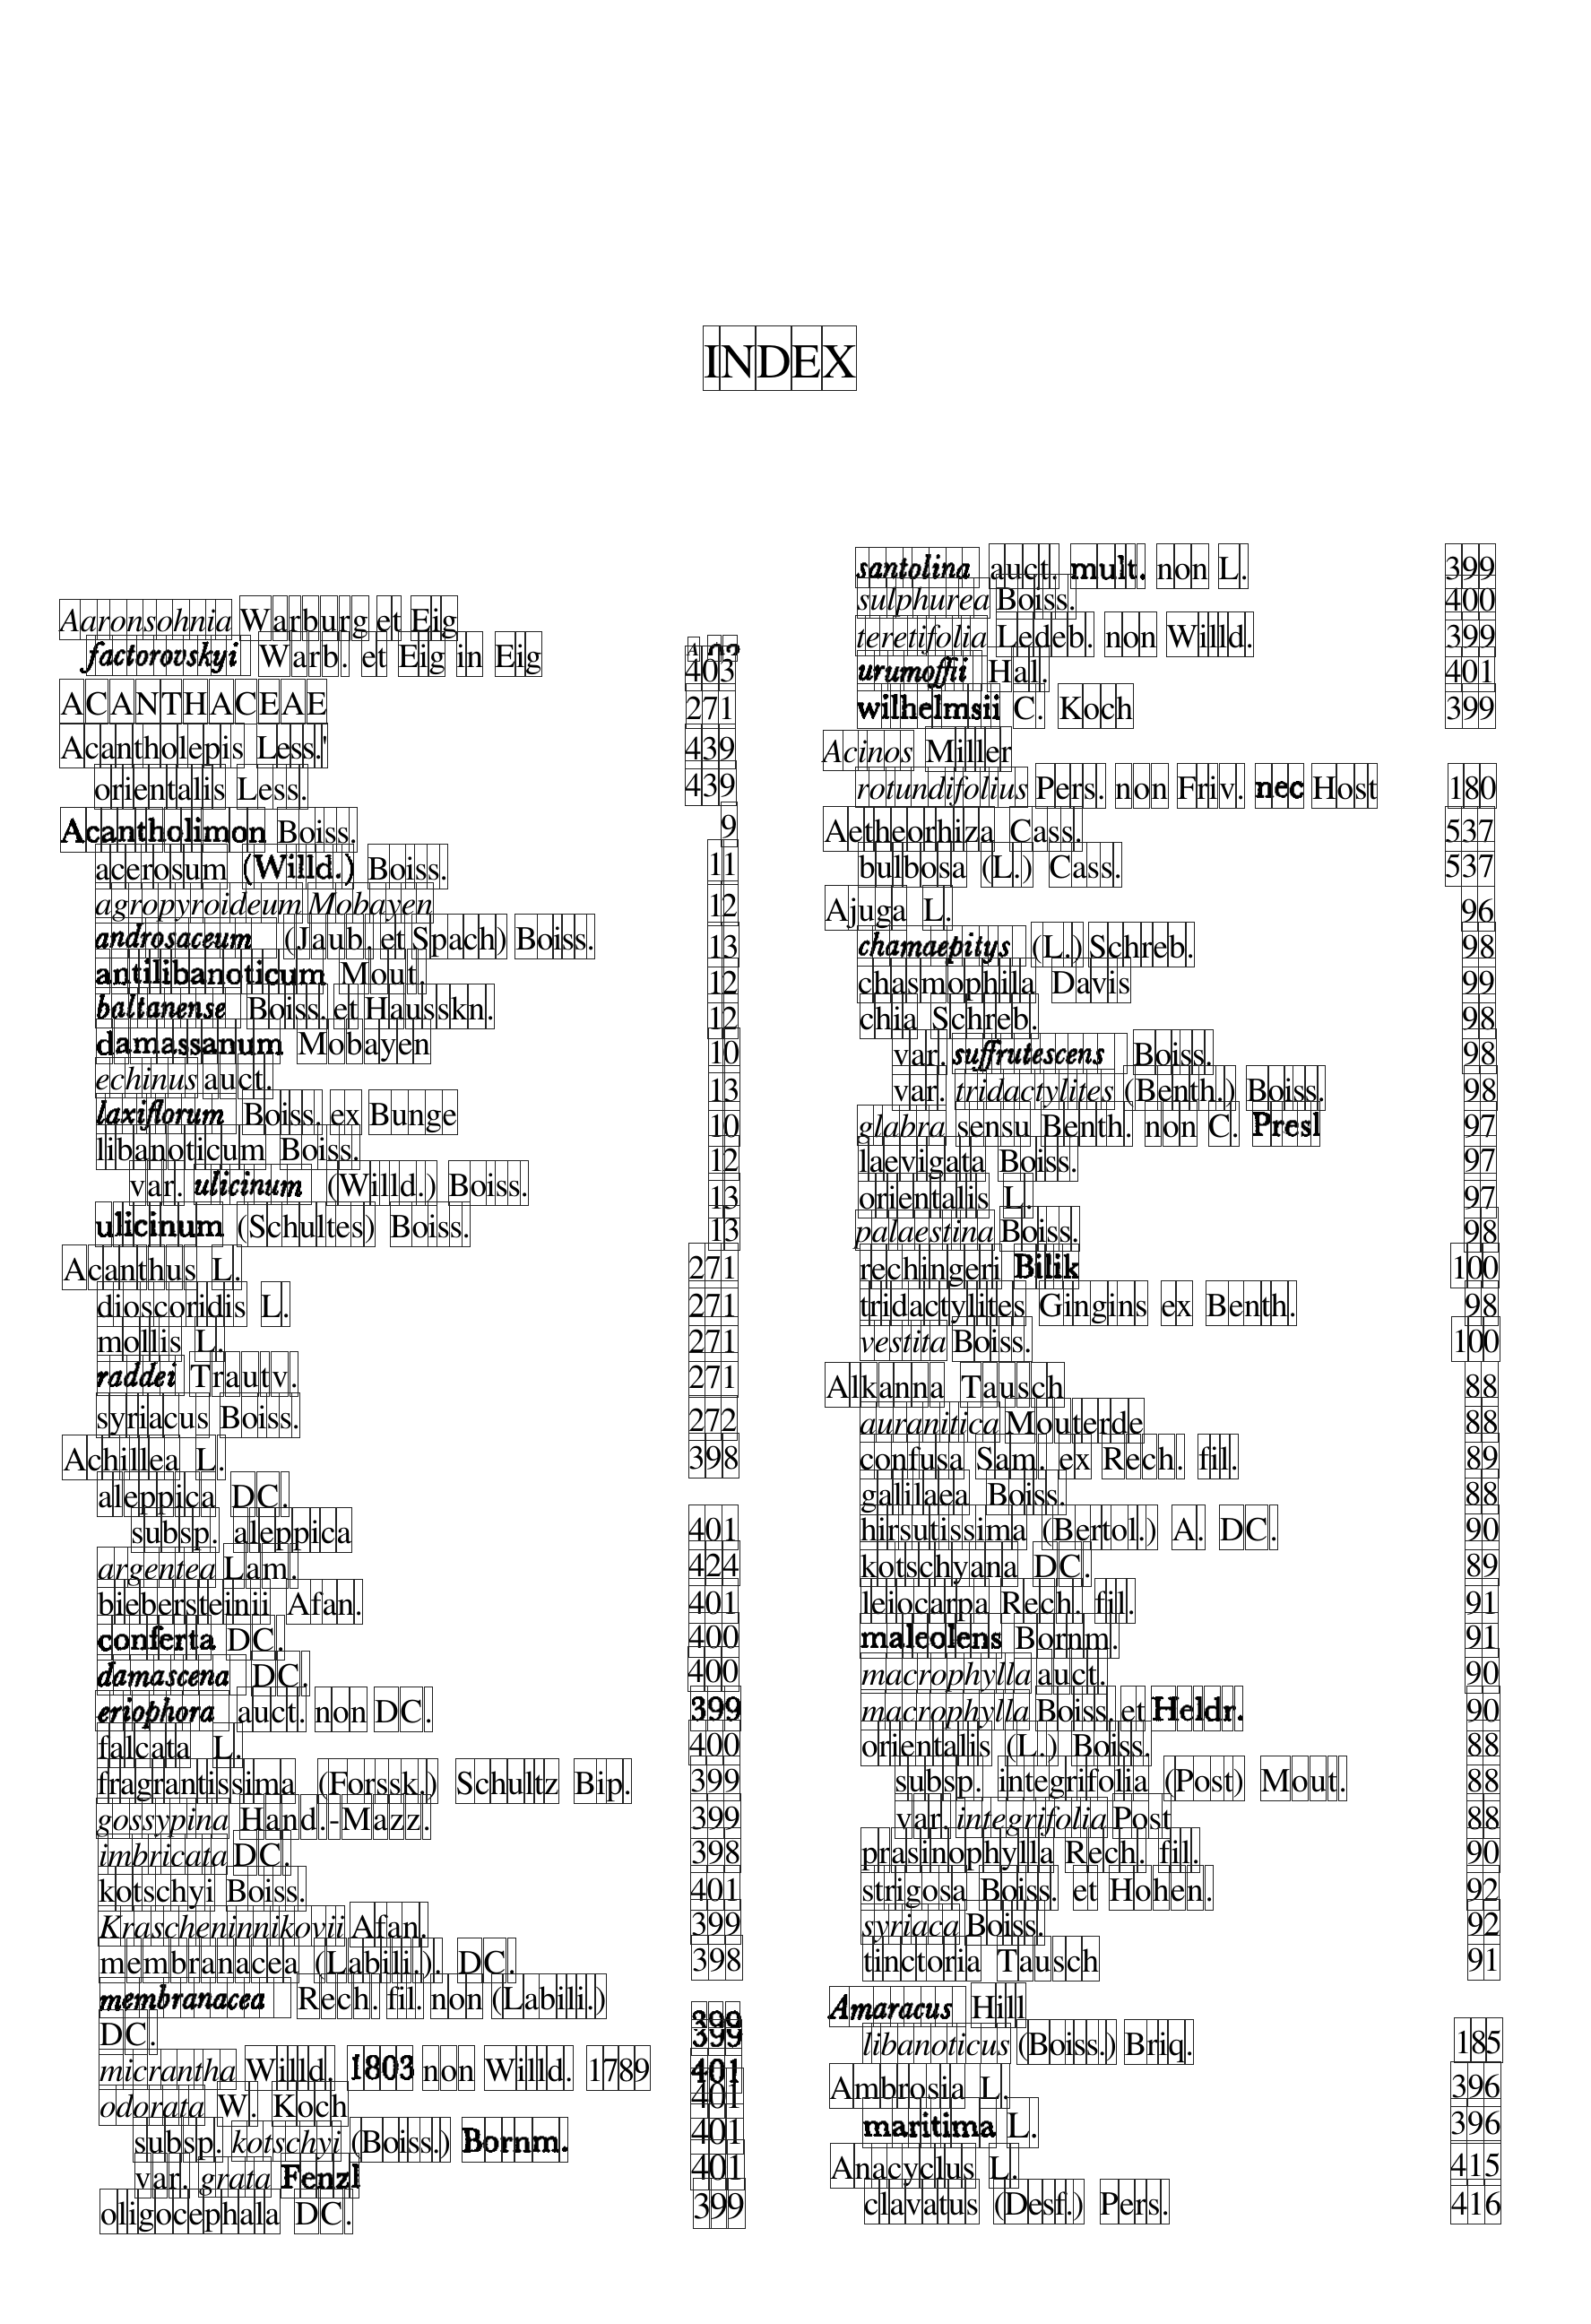

In [99]:
doc = vol3_doc
page_num = 555

pix_map = doc.get_page_pixmap(page_num,matrix=mat)
image = Image.open(io.BytesIO(pix_map.tobytes()))
draw = ImageDraw.Draw(image)

vol3_PKL[vol3_PKL['page_num'] == 400]
for coord in vol3_PKL[vol3_PKL['page_num'] == 555]['char_bbox']:
    x0, y0, x1, y1 = [f*TARGET_DPI/ 72 for f in coord]
    draw.rectangle((x0, y0, x1, y1), fill=None, outline=ImageColor.getrgb("#222222"))
image

# Untitled